# Zadanko 8 | Task 8

**[PL]**
Celem tego zadania jest symulacja przesłania zakodowanej wiadomości

**[EN]**.
The purpose of this task is to simulate the transmission of an encoded message

## Podpunkt a | Subpoint a

**[PL]**
Wygeneruj losową macierz o 10 kolumnach i 4 wierszach o wyrazach z ciała Z5 

**[EN]**
Generate a random matrix with 10 columns and 4 rows with words from the  Z5 field



In [6]:
import sympy as sp
from sympy import Matrix, pprint, symbols
import numpy as np
import matplotlib.pyplot as plt
from sympy import FF
import random
from random import choices
import itertools
from scipy.spatial.distance import hamming

In [7]:
def hamming_distance(a, b):
    if not (isinstance(a, list) and isinstance(b, list)):
        return int(hamming(list(a), list(b)) * len(a))
    return int(hamming(a, b) * len(a))

In [8]:
G = Matrix( 4, 10, lambda i, j: random.randint(0, 4))

## Podpunkt b | Subpoint b

**[PL]**
Dokonaj unormowania macierzy z podpunktu a) do przedziału [0, 1] dzieląc wszystkie wyrazy macierzy przez 4   
(w tym podpunkcie potraktuj elementy macierzy jako liczby całkowite, a nie elementy z ciała Z5 , czyli dzielenie przez 4 to standardowa operacja dzielenia na dwóch liczbach całkowitych). Na podstawie unormowanej macierzy utwórz obraz

**[EN]**
Normalize the matrix from subsection (a) to the interval [0, 1] by dividing all expressions of the matrix by 4  
(in this subsection, treat the elements of the matrix as integers, not elements from the body of Z5 , that is, dividing the dividing by 4 is a standard division operation on two integers). Based on the normalized matrix create the image

In [9]:
float_matrix_G = G.evalf() /4
pprint(float_matrix_G)
numpy_array_G = np.array(float_matrix_G.tolist()).astype('float64')

⎡ 0   0.75   0    1.0   0.25  1.0   1.0  1.0   0.5    0 ⎤
⎢                                                       ⎥
⎢ 0   1.0   0.75  0.25  0.5   0.75   0   0.5    0    1.0⎥
⎢                                                       ⎥
⎢1.0  0.25  0.25   0    0.5   0.25  0.5  0.75  0.25   0 ⎥
⎢                                                       ⎥
⎣0.5  0.5   0.75  0.25  0.25  0.5   1.0   0    1.0    0 ⎦


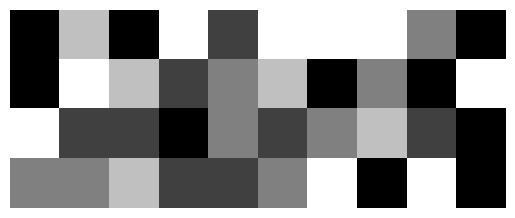

In [10]:
plt.imshow(numpy_array_G, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

## Podpunkt d | Subpoint d

**[PL]**
Dla dowolnej kolumny v macierzy z podpunktu a) zakoduj wektor v używajac macierzy generujacej G.

**[EN]**
For any column v of the matrix in subsection (a), encode the vector v using the generating matrix G.


In [11]:
random_column_index = random.randint(0, G.shape[1] - 1)

v = G[:, random_column_index]
w = (v.T * G).T % 5
w

Matrix([
[3],
[0],
[4],
[3],
[0],
[4],
[2],
[3],
[0],
[1]])

## Podpunkt e | Subpoint e

**[PL]**
Dla każdego zakodowanego wektora z podpunktu d) zasymuluj wysłanie go do pewnego użytkownika poprzez kanał, który dla przesyłanego wektora v dla każdej pozycji dodaje modulo 5 losową liczbę ze zbioru {0, 3}, przy czym prawdopodobieństwo dodania liczby 0 wynosi 0.95, zaś prawdopodobieństwo dodania 3 jestrówne 0.05.

**[EN]**
For each encoded vector from subsection (d), simulate sending it to some user through a channel that, for the transmitted vector v, for each position adds modulo 5 a random number from the set {0, 3}, where the probability of adding the number 0 is 0.95, and the probability of adding 3 is equal to 0.05.

In [12]:
coded_vectors=[]

In [13]:
for i in range(10):
  vec = (G[:,i].T * G).T %5
  vec_new=None


  result = [choices([0, 3], [0.95, 0.05])[0] for _ in range(10)]
  vec_new = vec+   Matrix(result)
  vec_new%=5

  coded_vectors.append(vec_new)


In [14]:
pprint(coded_vectors)

⎡⎡3⎤  ⎡1⎤  ⎡0⎤  ⎡2⎤  ⎡0⎤  ⎡3⎤  ⎡1⎤  ⎡2⎤  ⎡2⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢3⎥  ⎢0⎥  ⎢4⎥  ⎢1⎥  ⎢3⎥  ⎢4⎥  ⎢2⎥  ⎢3⎥  ⎢0⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢4⎥  ⎢4⎥  ⎢1⎥  ⎢1⎥  ⎢1⎥  ⎢4⎥  ⎢2⎥  ⎢3⎥  ⎢2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢3⎥  ⎢1⎥  ⎢3⎥  ⎢2⎥  ⎢1⎥  ⎢0⎥  ⎢3⎥  ⎢2⎥  ⎢4⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥  ⎢1⎥  ⎢2⎥  ⎢0⎥  ⎢4⎥  ⎢2⎥  ⎢4⎥  ⎢3⎥  ⎢1⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢3⎥  ⎢4⎥  ⎢1⎥  ⎢1⎥  ⎢2⎥  ⎢0⎥  ⎢1⎥  ⎢3⎥  ⎢2⎥  ⎢2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢2⎥  ⎢4⎥  ⎢0⎥  ⎢2⎥  ⎢1⎥  ⎢1⎥  ⎢2⎥  ⎢1⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢3⎥  ⎢4⎥  ⎢3⎥  ⎢4⎥  ⎢0⎥  ⎢2⎥  ⎢4⎥  ⎢1⎥  ⎢3⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢0⎥  ⎢1⎥  ⎢2⎥  ⎢3⎥  ⎢2⎥  ⎢1⎥  ⎢1⎥  ⎢1⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣3⎦  ⎣1⎦  ⎣2⎦  ⎣4⎦  ⎣1⎦  ⎣2⎦  ⎣0⎦  ⎣1⎦  ⎣0⎦  ⎣1⎦⎦


## Podpunkt f | Subpoint f

**[PL]**
Dla każdego zakodowanego wektora po przesłaniu go przez kanał odkoduj ten wektor używając algorytmu MinimizeHammingDistance.

**[EN]**.
For each encoded vector after it is transmitted through the channel, decode that vector using the algorithm MinimizeHammingDistance.

In [15]:
def find_coords(B: Matrix, modulus: int,v):
    code_words = []
    for x in itertools.product(range(modulus), repeat = B.shape[1]):
        code_word = (B * Matrix(x)) % modulus
        if code_word==v:
            return x

# Find the minimal hamming distance
def find_minimal_distance(v: Matrix, G: Matrix):
    min_distance = len(v)
    for x in itertools.product(range(5), repeat=4):
        vector = (Matrix(x).T * G).T % 5
        distance = hamming_distance(v, vector)
        if distance < min_distance:
            min_distance = distance
    return min_distance

# Generate the minimal distance subspace for vector v from Z^4 modulo 5 and generative matrix G
def generate_minimal_distance_subspace(v: Matrix, G: Matrix):
    min_distance = find_minimal_distance(v, G)
    subspace = []
    for x in itertools.product(range(5), repeat=4):
        vector = (Matrix(x).T * G).T % 5
        if hamming_distance(v, vector) == min_distance and vector not in subspace:
            subspace.append(vector)
    return subspace

# Choose random vector from the space
def choose_random_vector(S: list):
    return S[random.randint(0, len(S) - 1)]

# Implement the minimize hamming distance algorithm
def minimize_hamming_distance(v: Matrix, G: Matrix):
    w = choose_random_vector(generate_minimal_distance_subspace(v, G))
    r = find_coords(G.T,5,w)
    return Matrix(list(r))




In [16]:
encoded_vectors=[]

In [17]:
for i in range(10):
  vec_to_encode=coded_vectors[i]
  vec_enc = minimize_hamming_distance(vec_to_encode,G)
  encoded_vectors.append(list(vec_enc))

## Podpunkt g | Subpoint g

**[PL]**
Z odkodowanych wektorów utwórz macierz odpowiadającą macierzy kodowanej z podpunktu a)

**[EN]**
From the decoded vectors, create a matrix corresponding to the encoded matrix from subsection a)

In [18]:
G_2 = Matrix(encoded_vectors).T
pprint(G_2)


⎡0  3  0  4  1  4  4  4  2  0⎤
⎢                            ⎥
⎢0  4  3  1  2  3  0  2  0  4⎥
⎢                            ⎥
⎢4  1  1  0  2  1  2  3  1  0⎥
⎢                            ⎥
⎣2  2  3  1  1  2  4  0  4  0⎦


## Podpunkt h | Subpoint h

**[PL]**
Porównaj macierze z podpunktu a) i g). Ile kolumn macierzy z podpunktu a) zostało poprawnie odkodowanych?

**[EN]**
Compare the matrices from subsection (a) and (g). How many columns of the matrix from subsection (a) were decoded correctly?

In [19]:
pprint(G)
print('------------------------------------------')
pprint(G_2)

⎡0  3  0  4  1  4  4  4  2  0⎤
⎢                            ⎥
⎢0  4  3  1  2  3  0  2  0  4⎥
⎢                            ⎥
⎢4  1  1  0  2  1  2  3  1  0⎥
⎢                            ⎥
⎣2  2  3  1  1  2  4  0  4  0⎦
------------------------------------------
⎡0  3  0  4  1  4  4  4  2  0⎤
⎢                            ⎥
⎢0  4  3  1  2  3  0  2  0  4⎥
⎢                            ⎥
⎢4  1  1  0  2  1  2  3  1  0⎥
⎢                            ⎥
⎣2  2  3  1  1  2  4  0  4  0⎦


## Podpunkt i | Subpoint i

**[PL]**
Wyrazy odkodowanej macierzy z podpunktu g) unormuj do przedziału [0, 1] analogiczną metodą jak w podpunkcie b)

 Następnie dla unormowanej macierzy utwórz obraz analogicznie jak w podpunkcie b)

 **[EN]**
Normalize the expressions of the decoded matrix from subsection (g) to the interval [0, 1] using the analogous method as in subsection (b).  
 Then, for the normalized matrix, create an image analogously as in subsection (b)

In [20]:
float_matrix_G2 = G_2.evalf() /4
numpy_array_G2 = np.array(float_matrix_G2.tolist()).astype('float64')

pprint(float_matrix_G2)

⎡ 0   0.75   0    1.0   0.25  1.0   1.0  1.0   0.5    0 ⎤
⎢                                                       ⎥
⎢ 0   1.0   0.75  0.25  0.5   0.75   0   0.5    0    1.0⎥
⎢                                                       ⎥
⎢1.0  0.25  0.25   0    0.5   0.25  0.5  0.75  0.25   0 ⎥
⎢                                                       ⎥
⎣0.5  0.5   0.75  0.25  0.25  0.5   1.0   0    1.0    0 ⎦


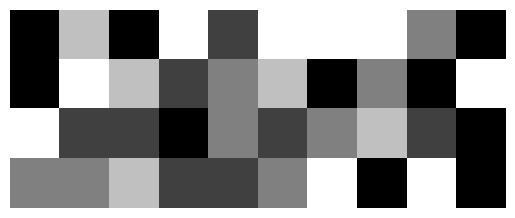

In [21]:
plt.imshow(numpy_array_G2, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

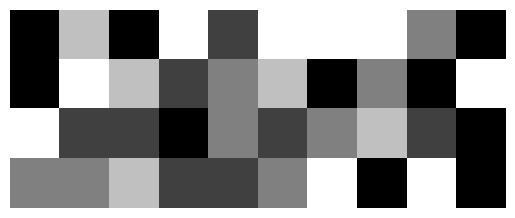

In [22]:
plt.imshow(numpy_array_G, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()